In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
cust_data = pd.read_csv('mytable_customer_details.csv', index_col=0)

### My questions:

### Is there a difference in the rate of churn for month-to-month customers who have fiber internet vs. customers who do not?

### Is there a correlation between monthly charges and tenure?

In [3]:
# Original df had 7049 customers either month_to_month or on contracts.

cust_data.shape

(7049, 24)

In [4]:
# Filtering out any customers on a contract.

cust_data = cust_data[cust_data.contract_type == 0]

In [5]:
cust_data.head(1)

,gender,is_senior_citizen,partner,dependents,partner_dependents,phone_service,phone_type,internet_service,internet_type,contract_type,...,churn,tenure,total_projection,is_female,has_churned,has_phone,has_internet,has_phone_and_internet,start_date,avg_monthly_charge
customer_id,,,,,,,,,,,,,,,,,,,,,
0003-MKNFE,Male,No,No,No,0,2,Two or More Lines,1,DSL,0,...,No,9.06,NaN,False,False,True,True,True,2020-05-03,59.9


In [6]:
cust_data.tail(1)

,gender,is_senior_citizen,partner,dependents,partner_dependents,phone_service,phone_type,internet_service,internet_type,contract_type,...,churn,tenure,total_projection,is_female,has_churned,has_phone,has_internet,has_phone_and_internet,start_date,avg_monthly_charge
customer_id,,,,,,,,,,,,,,,,,,,,,
NaN,Male,No,No,No,0,1,One Line,1,DSL,0,...,No,1.84,NaN,False,False,True,True,True,2021-01-03,50.3


In [7]:
# After filtering for only month_to_month customers, I have 3876 customers left.

cust_data.shape

(3876, 24)

In [8]:
cust_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3876 entries, 0003-MKNFE to nan
Data columns (total 24 columns):
gender                    3876 non-null object
is_senior_citizen         3876 non-null object
partner                   3876 non-null object
dependents                3876 non-null object
partner_dependents        3876 non-null int64
phone_service             3876 non-null int64
phone_type                3876 non-null object
internet_service          3876 non-null int64
internet_type             3876 non-null object
contract_type             3876 non-null int64
contract_details          3876 non-null object
payment_type              3876 non-null object
monthly_charges           3876 non-null float64
total_charges             3876 non-null float64
churn                     3876 non-null object
tenure                    3876 non-null float64
total_projection          0 non-null float64
is_female                 3876 non-null bool
has_churned               3876 non-null bool
has_

In [9]:
cust_data.describe()

,partner_dependents,phone_service,internet_service,contract_type,monthly_charges,total_charges,tenure,total_projection,avg_monthly_charge
count,3876.000000,3876.000000,3876.000000,3876.0,3876.000000,3876.000000,3876.000000,0.0,3876.000000
mean,0.763932,1.285088,1.413829,0.0,66.389229,1368.909185,18.019778,NaN,66.389229
std,1.090841,0.631226,0.716302,0.0,26.929298,1613.814021,17.698651,NaN,26.929298
min,0.000000,0.000000,0.000000,0.0,18.750000,18.850000,1.000000,NaN,18.750000
25%,0.000000,1.000000,1.000000,0.0,45.837500,159.437500,3.127500,NaN,45.837500
50%,0.000000,1.000000,2.000000,0.0,73.225000,679.425000,11.775000,NaN,73.225000
75%,1.000000,2.000000,2.000000,0.0,88.862500,2066.250000,28.245000,NaN,88.862500
max,3.000000,2.000000,2.000000,0.0,117.450000,8061.500000,71.990000,NaN,117.450000


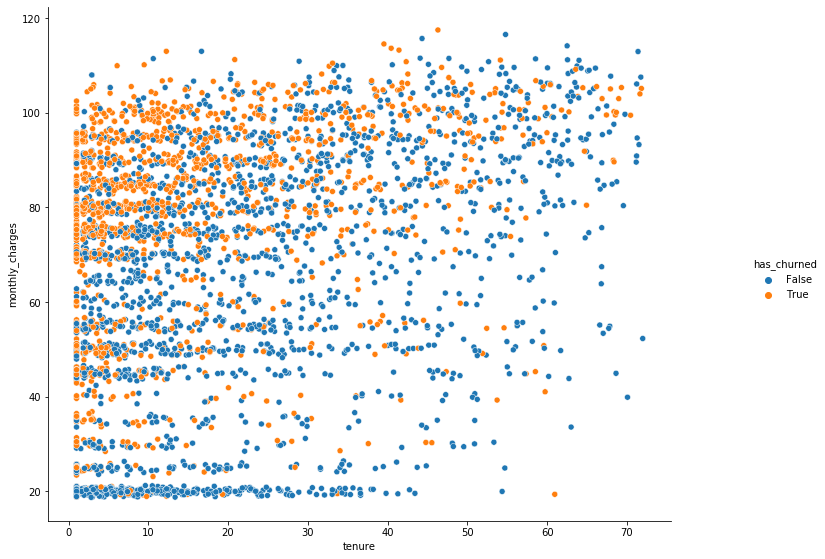

In [10]:
sns.relplot(data = cust_data, y = 'monthly_charges', x = 'tenure', hue='has_churned')

fig = plt.gcf()
fig.set_size_inches(12, 8)

In [11]:
cust_data.internet_type

customer_id
0003-MKNFE                    DSL
0004-TLHLJ            Fiber Optic
0011-IGKFF            Fiber Optic
0013-EXCHZ            Fiber Optic
0013-MHZWF                    DSL
                     ...         
9992-RRAMN    No Internet Service
9995-HOTOH            Fiber Optic
NaN           No Internet Service
NaN                   Fiber Optic
NaN                           DSL
Name: internet_type, Length: 3876, dtype: object

<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


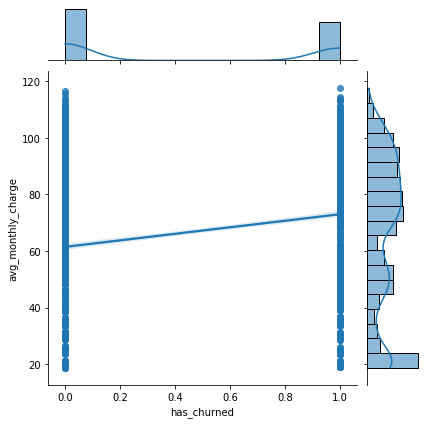

In [12]:
sns.jointplot(data = cust_data, y = 'avg_monthly_charge', x = 'has_churned', kind = 'reg')

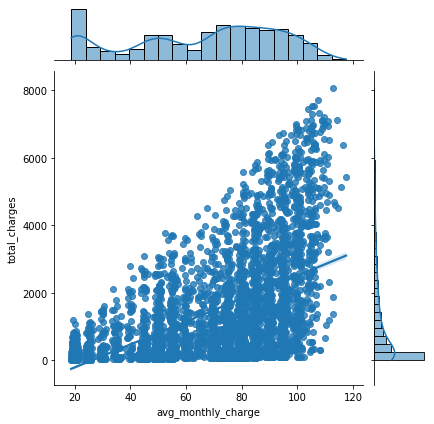

In [13]:
sns.jointplot(data = cust_data, x = 'avg_monthly_charge', y = 'total_charges', kind = 'reg')

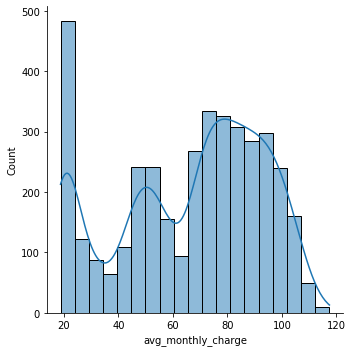

In [14]:
sns.displot(cust_data.avg_monthly_charge, kde = True)

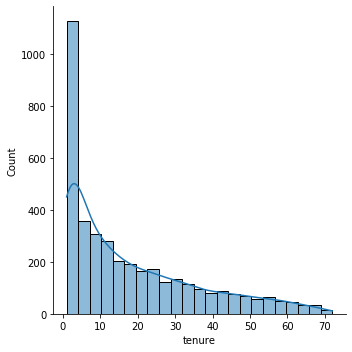

In [15]:
sns.displot(cust_data.tenure, kde = True)

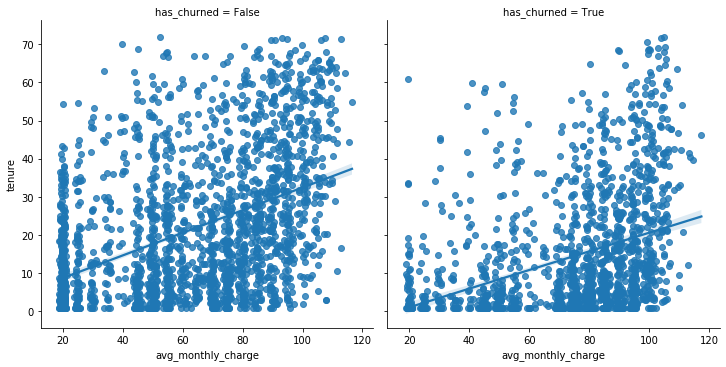

In [16]:
sns.lmplot(x = 'avg_monthly_charge', y = 'tenure', col = 'has_churned', data = cust_data)

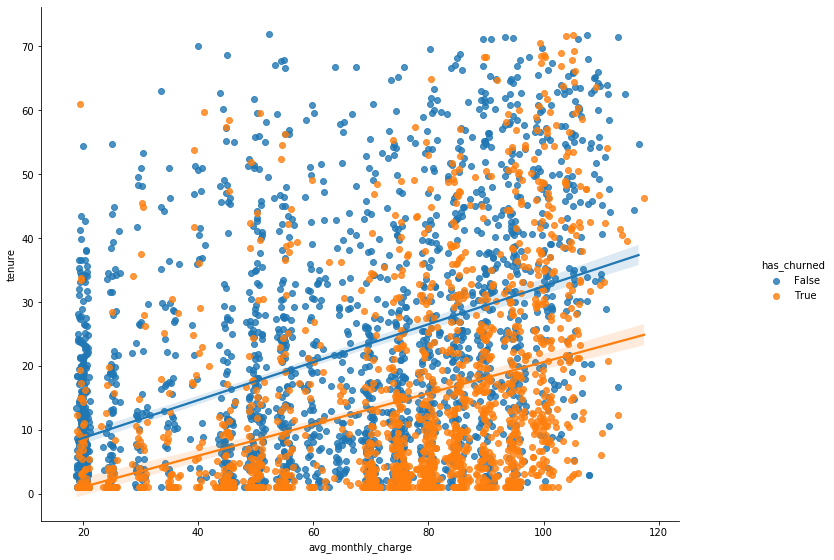

In [17]:
sns.lmplot(x = 'avg_monthly_charge', y = 'tenure', hue = 'has_churned', data = cust_data, ci = 95)

fig = plt.gcf()
fig.set_size_inches(12, 8)

## Finally getting to data that looks promising...

### After several dead-end attempts, I found a potential driver of churn that intrigued me. It was the relationship between churn and the type of Internet service.

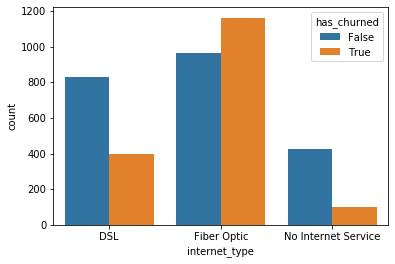

In [18]:
# Getting q clearer picture

sns.countplot(x = 'internet_type', data = cust_data, hue= 'has_churned')

fig = plt.gcf()
fig.set_size_inches(6, 4)

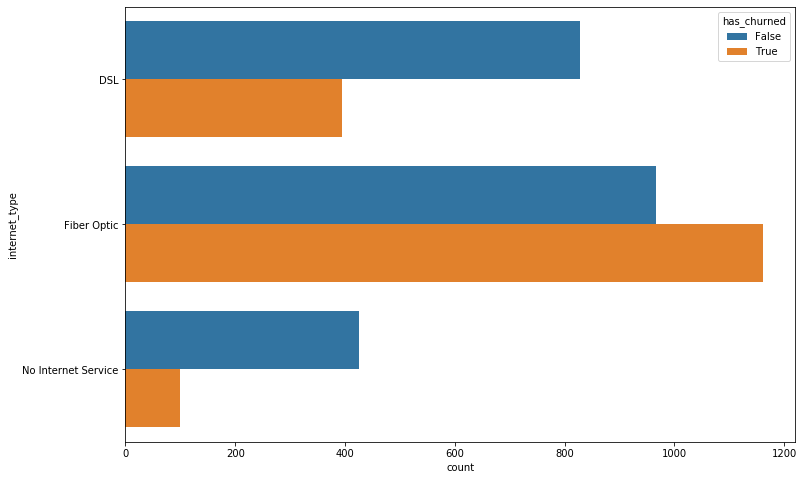

In [19]:
# An alternate view

sns.countplot(y = 'internet_type', data = cust_data, hue= 'has_churned')

fig = plt.gcf()

fig.set_size_inches(12, 8)

/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 58.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 67.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 51.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


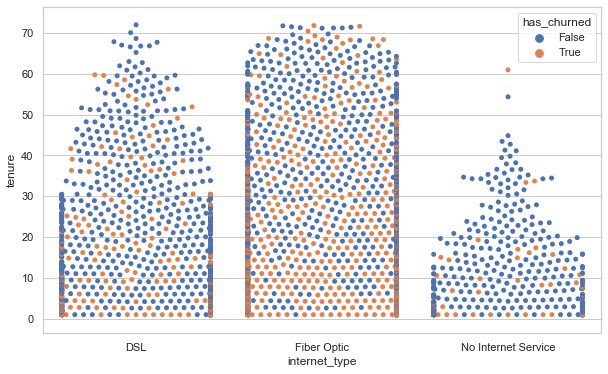

In [20]:
# Digger deeper

sns.set_theme(style="whitegrid")
sns.swarmplot(x='internet_type', y='tenure', data=cust_data , hue='has_churned')

fig = plt.gcf()
fig.set_size_inches(10, 6)

In [21]:
cust_data.head(1)

,gender,is_senior_citizen,partner,dependents,partner_dependents,phone_service,phone_type,internet_service,internet_type,contract_type,...,churn,tenure,total_projection,is_female,has_churned,has_phone,has_internet,has_phone_and_internet,start_date,avg_monthly_charge
customer_id,,,,,,,,,,,,,,,,,,,,,
0003-MKNFE,Male,No,No,No,0,2,Two or More Lines,1,DSL,0,...,No,9.06,NaN,False,False,True,True,True,2020-05-03,59.9


- Out of all of the month-to-month customers, what percent of those who have churned had Fiber Optic service?

In [36]:
fiber_churn = len(cust_data[(cust_data.internet_type == 'Fiber Optic') & (cust_data.has_churned == True)])
fiber_churn

1162

In [37]:
churned = len(cust_data[cust_data.has_churned == True])
churned

1656

In [44]:
percent_fiber_churn = round(fiber_churn / churned, 2) * 100
percent_fiber_churn

70.0

- What percent of total churn for month-to-month customers is occuring within the first six months?

-  49% of customer churn is occuring in the first six months for month-to-month customers

In [47]:
churned_customers = cust_data[cust_data.has_churned == True]

In [61]:
six_month_churn = len(churned_customers[churned_customers.tenure < 7])

In [64]:
round(six_month_churn / churned * 100)

49

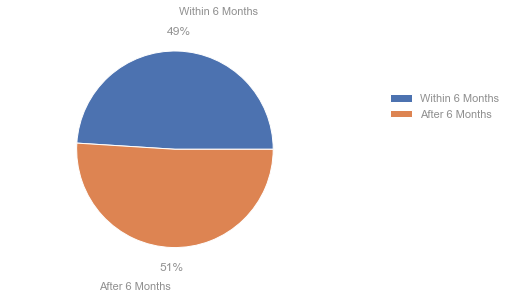

In [74]:
fig, ax = plt.subplots()

labels = ['Within 6 Months', 
         'After 6 Months']
percentages = [49, 51]

ax.pie(percentages, labels=labels,  
        autopct='%1.0f%%', 
       shadow=False, startangle=0,   
       pctdistance=1.2,labeldistance=1.4)

ax.axis('equal')
ax.legend(frameon=False, bbox_to_anchor=(1.5,0.8))
plt.show()

- How much on average were Fiber Optic customers who churned paying verses those who didn't?


- Subset of Fiber Optic customers who churned == fiber_churn



- Subset of Fiber Optic customers who did not churn == fiber_no_churn


- Average monthly charges for those who churned and did not churn.


- Those who churned paid $81 per month on average. Those who didn't, paid $80 per month on average.

In [79]:
fiber_churn = cust_data[(cust_data.internet_type == 'Fiber Optic') & (cust_data.has_churned == True) & (cust_data.tenure < 7)]

In [81]:
fiber_no_churn = cust_data[(cust_data.internet_type == 'Fiber Optic') & (cust_data.has_churned == False) & (cust_data.tenure < 7)]

In [82]:
fiber_churn.monthly_charges.mean()

81.14093749999996

In [83]:
fiber_no_churn.monthly_charges.mean()

79.74378698224855